In [113]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
# print(f"{device}" " is available.")

### Loading CSV Files
The following code block is reading in 2 CSV files of data, both contain data from deployments on different days of distributed air sensors. They contain data for 12 seperate nodes.

In [114]:
# UPLOADING CSV ON COLAB
#from google.colab import files
#data_to_load = input()
# import io
# AF_Data1 = pd.read_csv(io.BytesIO(data_to_load['2021_06_29_AirQ_headers.csv']))
# AF_Data2 = pd.read_csv(io.BytesIO(data_to_load['2021_07_01_AirQ_headers.csv']))

#UPLOADING FILES LOCALLY
AF_Data1 = pd.read_csv("AF_Data/2021_06_29_AirQ_headers.csv")
AF_Data2 = pd.read_csv("AF_Data/2021_07_01_AirQ_headers.csv")

### Function for plotting DF data

In [115]:
import plotly.graph_objs as go
from plotly.offline import iplot

def plot_dataset(df, title, field):
    data = []
    
    value = go.Scatter(
        x=df.index,
        y=df[field],
        mode="lines",
        name="values",
        marker=dict(),
        text=df.index,
        line=dict(color="rgba(0,0,0, 0.3)"),
    )
    data.append(value)

    layout = dict(
        title=title,
        xaxis=dict(title="Date", ticklen=5, zeroline=False),
        yaxis=dict(title="Value", ticklen=5, zeroline=False),
    )

    fig = dict(data=data, layout=layout)
    iplot(fig)
    

In [116]:
# Replace epoch time with DateTime in DF
AF_Data1['Teensy Server Time'] = AF_Data1['Teensy Server Time'].apply(lambda x: datetime.datetime.fromtimestamp(x))
AF_Data2['Teensy Server Time'] = AF_Data2['Teensy Server Time'].apply(lambda x: datetime.datetime.fromtimestamp(x))

# Move time stamp of second dataset 9 days in the future to avoid overlap
AF_Data2['Teensy Server Time'] = AF_Data2['Teensy Server Time'].apply(lambda x: x + datetime.timedelta(days=9))

# Seperate measurements of seperate node data into their own day
num_nodes = 12
for i in range(2,num_nodes+1):
    AF_Data1.loc[AF_Data1['Node ID'] == i, "Teensy Server Time"] += datetime.timedelta(days=i-1)
    AF_Data2.loc[AF_Data2['Node ID'] == i, "Teensy Server Time"] += datetime.timedelta(days=i-1)

frames = [AF_Data1, AF_Data2]
AF_Data = pd.concat(frames)

# Set the index to the time of sample
AF_Data = AF_Data.set_index(['Teensy Server Time'])
#AF_Data.index = pd.to_datetime(AF_Data.index)
if not AF_Data.index.is_monotonic:
    AF_Data = AF_Data.sort_index()


### Removing outliers from data
Due to cost constraint on the distributed nodes it is known that certain sensors can have somewhat inconsistent measurements or NaN measurements. I am handling this by finding outlier data points and replacing them with the average measurement

In [117]:
rate = 7
# TEMP DATA
mean_temp = AF_Data['Temp'].mean()
std = AF_Data['Temp'].std()
outliers = (AF_Data['Temp'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'Temp'] = np.nan
AF_Data['Temp'].fillna(mean_temp, inplace=True)

# HUMIDITY DATA
mean_temp = AF_Data['Humidity'].mean()
std = AF_Data['Humidity'].std()
outliers = (AF_Data['Humidity'] - mean_temp).abs() > std
AF_Data.loc[outliers, 'Humidity'] = np.nan
AF_Data['Humidity'].fillna(mean_temp, inplace=True)

# SOUND DATA
mean_temp = AF_Data['Sound'].mean()
std = AF_Data['Sound'].std()
outliers = (AF_Data['Sound'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'Sound'] = np.nan
AF_Data['Sound'].fillna(mean_temp, inplace=True)

# C02 DATA
mean_temp = AF_Data['CO2'].mean()
std = AF_Data['CO2'].std()
outliers = (AF_Data['CO2'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'CO2'] = np.nan
AF_Data['CO2'].fillna(mean_temp, inplace=True)

# PM1 DATA
mean_temp = AF_Data['PM1'].mean()
std = AF_Data['PM1'].std()
outliers = (AF_Data['PM1'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'PM1'] = np.nan
AF_Data['PM1'].fillna(mean_temp, inplace=True)

# PM2.5 DATA
mean_temp = AF_Data['PM2.5'].mean()
std = AF_Data['PM2.5'].std()
outliers = (AF_Data['PM2.5'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'PM2.5'] = np.nan
AF_Data['PM2.5'].fillna(mean_temp, inplace=True)

# PM10 DATA
mean_temp = AF_Data['PM10'].mean()
std = AF_Data['PM10'].std()
outliers = (AF_Data['PM10'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'PM10'] = np.nan
AF_Data['PM10'].fillna(mean_temp, inplace=True)

# VOC DATA
mean_temp = AF_Data['VOC'].mean()
std = AF_Data['VOC'].std()
outliers = (AF_Data['VOC'] - mean_temp).abs() > std*rate
AF_Data.loc[outliers, 'VOC'] = np.nan
AF_Data['VOC'].fillna(mean_temp, inplace=True)

### Numpy

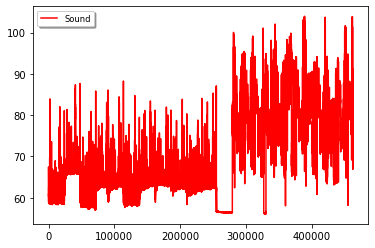

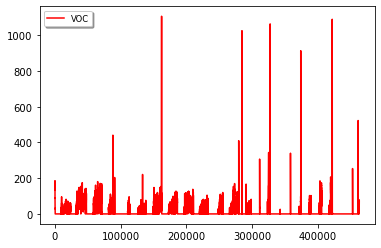

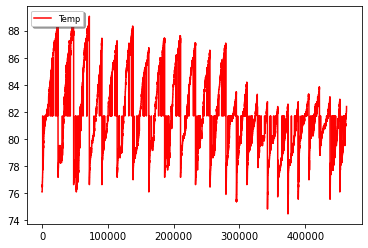

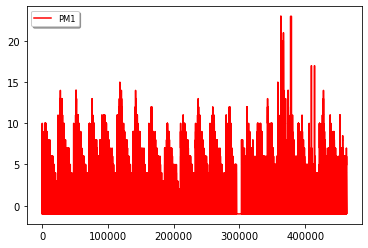

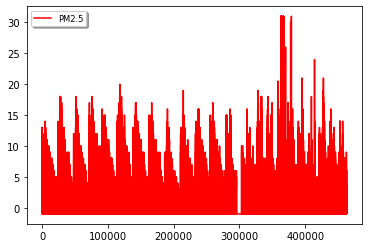

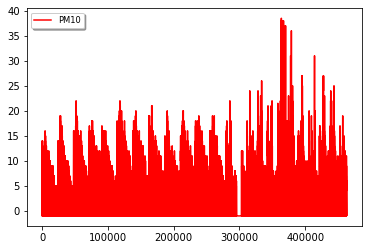

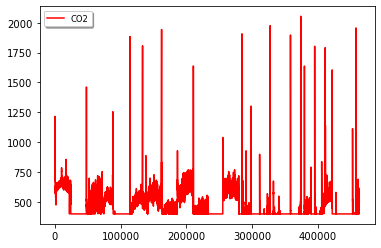

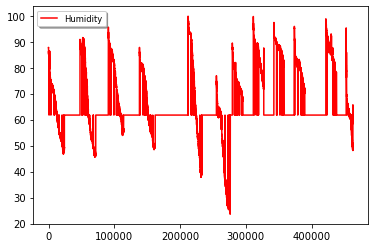

In [118]:
sound = AF_Data['Sound'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(sound,'r',label='Sound')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

voc = AF_Data['VOC'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(voc,'r',label='VOC')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

temp = AF_Data['Temp'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(temp,'r',label='Temp')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

pm1 = AF_Data['PM1'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(pm1,'r',label='PM1')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

pm25 = AF_Data['PM2.5'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(pm25,'r',label='PM2.5')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

pm10 = AF_Data['PM10'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(pm10,'r',label='PM10')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

co2 = AF_Data['CO2'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(co2,'r',label='CO2')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

hum = AF_Data['Humidity'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(hum,'r',label='Humidity')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

### Generating cyclical time features

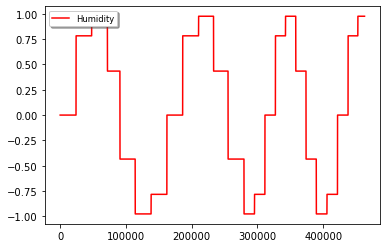

In [119]:
def generate_cyclical_features(df, col_name, period, start_num=0):
    kwargs = {
        f'sin_{col_name}' : lambda x: np.sin(2*np.pi*(df[col_name]-start_num)/period),
        f'cos_{col_name}' : lambda x: np.cos(2*np.pi*(df[col_name]-start_num)/period)    
             }
    return df.assign(**kwargs).drop(columns=[col_name])

AF_Data = (
                AF_Data
                .assign(minute = AF_Data.index.minute)
                .assign(hour = AF_Data.index.hour)
                .assign(day_of_week = AF_Data.index.dayofweek)
              )

AF_Data = generate_cyclical_features(AF_Data, 'minute', 60, 0)
AF_Data = generate_cyclical_features(AF_Data, 'hour', 24, 0)
AF_Data = generate_cyclical_features(AF_Data, 'day_of_week', 7, 0)

hum = AF_Data['sin_day_of_week'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(hum,'r',label='Humidity')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')

### RNN Class definition

In [120]:
class RNNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob):
        super(RNNModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        # RNN layers
        self.rnn = nn.RNN(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    # Forward propagation on input tensor(x)
    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=torch.device(device)).requires_grad_()
        #h0 = h0.to(device)

        # Forward propagation by passing in the input and hidden state into the model
        out, h0 = self.rnn(x, h0.detach())

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        out = out[:, -1, :]

        # Convert the final state to desired output shape (batch_size, output_dim)
        out = self.fc(out)
        return out

In [121]:
# Helper class for training and making predictions
class Optimization:
    # Arguments are model, loss function and the optimizer
    def __init__(self, model, loss_fn, optimizer):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []
    
    # Complete one step of training with features (x) and label (y)
    def train_step(self, x, y):
        # Sets model to train mode
        self.model.train()

        # Makes predictions
        yhat = self.model(x)

        # Computes loss
        loss = self.loss_fn(y, yhat)

        # Computes gradients
        loss.backward()

        # Updates parameters and zeroes gradients
        self.optimizer.step()
        self.optimizer.zero_grad()

        # Returns the loss
        return loss.item()

    # Function to complete model training
    # train_loader is the DataLoader for training data
    # val_loader is the DataLoader for validation data
    # Computes and prints validation and training loss
    def train(self, train_loader, val_loader, batch_size=64, n_epochs=50, n_features=1):
        for epoch in range(1, n_epochs + 1):
            batch_losses = []
            for x_batch, y_batch in train_loader:
                x_batch = x_batch.view([batch_size, -1, n_features]).to(device)
                y_batch = y_batch.to(device)
                loss = self.train_step(x_batch, y_batch)
                batch_losses.append(loss)
            training_loss = np.mean(batch_losses)
            self.train_losses.append(training_loss)

            with torch.no_grad():
                batch_val_losses = []
                for x_val, y_val in val_loader:
                    x_val = x_val.view([batch_size, -1, n_features]).to(device)
                    y_val = y_val.to(device)
                    self.model.eval()
                    yhat = self.model(x_val)
                    val_loss = self.loss_fn(y_val, yhat).item()
                    batch_val_losses.append(val_loss)
                validation_loss = np.mean(batch_val_losses)
                self.val_losses.append(validation_loss)

            print(
                f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}\t Validation loss: {validation_loss:.4f}"
            )


    def evaluate(self, test_loader, batch_size=1, n_features=1):
        with torch.no_grad():
            predictions = []
            values = []
            for x_test, y_test in test_loader:
                x_test = x_test.view([batch_size, -1, n_features]).to(device)
                y_test = y_test.to(device)
                self.model.eval()
                yhat = self.model(x_test)
                predictions.append(yhat.to(device).detach().numpy())
                values.append(y_test.to(device).detach().numpy())

        return predictions, values

    # Plotting training and validation loss
    def plot_losses(self):
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")
        plt.show()
        plt.close()

### Splitting into training, test and validation data sets
and dropping unneccesarry data from DF

In [122]:
from sklearn.model_selection import train_test_split

# removing Rpi Time and node id from dataset
AF_Data = AF_Data.drop(columns='Rpi Time')
AF_Data = AF_Data.drop(columns='Node ID')

def feature_label_split(df, target_col):
    y = df[[target_col]]
    X = df.drop(columns=[target_col])
    return X, y

def train_val_test_split(df, target_col, test_ratio):
    val_ratio = test_ratio / (1 - test_ratio)
    X, y = feature_label_split(df, target_col)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_ratio, shuffle=False)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(AF_Data, 'Sound', 0.1)

### Apply scaling

In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_arr = scaler.fit_transform(X_train)
X_val_arr = scaler.transform(X_val)
X_test_arr = scaler.transform(X_test)

y_train_arr = scaler.fit_transform(y_train)
y_val_arr = scaler.transform(y_val)
y_test_arr = scaler.transform(y_test)

### Dataloaders

In [124]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 64

train_features = torch.Tensor(X_train_arr)
train_targets = torch.Tensor(y_train_arr)
val_features = torch.Tensor(X_val_arr)
val_targets = torch.Tensor(y_val_arr)
test_features = torch.Tensor(X_test_arr)
test_targets = torch.Tensor(y_test_arr)

if torch.cuda.is_available():
   train_features = train_features.to(device)
   train_targets = train_targets.to(device) 
   val_features = val_features.to(device)
   val_targets = val_targets.to(device) 
   test_features = test_features.to(device) 
   test_targets = test_targets.to(device)  
  

train = TensorDataset(train_features, train_targets)
val = TensorDataset(val_features, val_targets)
test = TensorDataset(test_features, test_targets)


train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader_one = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)

[1/100] Training loss: 0.1804	 Validation loss: 0.7177
[2/100] Training loss: 0.1912	 Validation loss: 0.8276
[3/100] Training loss: 0.1942	 Validation loss: 1.0340
[4/100] Training loss: 0.1869	 Validation loss: 1.9349
[5/100] Training loss: 0.1913	 Validation loss: 1.4797
[6/100] Training loss: 0.1868	 Validation loss: 1.4499
[7/100] Training loss: 0.1880	 Validation loss: 0.7564
[8/100] Training loss: 0.1869	 Validation loss: 1.1388
[9/100] Training loss: 0.1826	 Validation loss: 1.9698
[10/100] Training loss: 0.1851	 Validation loss: 2.4626
[11/100] Training loss: 0.1855	 Validation loss: 1.7232
[12/100] Training loss: 0.1788	 Validation loss: 3.2160
[13/100] Training loss: 0.1753	 Validation loss: 1.9123
[14/100] Training loss: 0.1715	 Validation loss: 2.6656
[15/100] Training loss: 0.1650	 Validation loss: 1.3449
[16/100] Training loss: 0.1507	 Validation loss: 2.6341
[17/100] Training loss: 0.1538	 Validation loss: 2.7468
[18/100] Training loss: 0.1479	 Validation loss: 2.6113
[

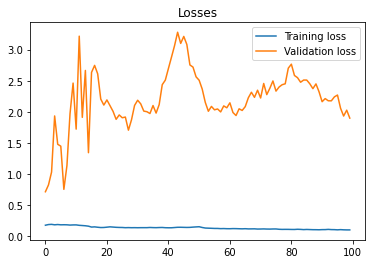

In [125]:
import torch.optim as optim

input_dim = len(X_train.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 3
batch_size = 64
dropout = 0.2
n_epochs = 100
learning_rate = 1e-3
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout}

model = RNNModel(**model_params)

if torch.cuda.is_available():
   model.to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)


opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer)
opt.train(train_loader, val_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()

predictions, values = opt.evaluate(
    test_loader_one,
    batch_size=1,
    n_features=input_dim
)

### Predictions

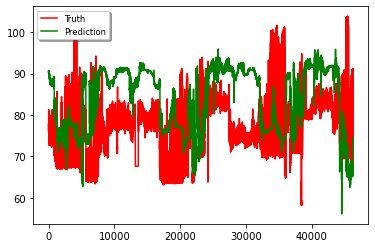

In [126]:
def inverse_transform(scaler, df, columns):
    for col in columns:
        df[col] = scaler.inverse_transform(df[col])
    return df


def format_predictions(predictions, values, df_test, scaler):
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    df_result = pd.DataFrame(data={"value": vals, "prediction": preds}, index=df_test.head(len(vals)).index)
    df_result = df_result.sort_index()
    df_result = inverse_transform(scaler, df_result, [["value", "prediction"]])
    return df_result


df_result = format_predictions(predictions, values, X_test, scaler)
df_result
truth = df_result['value'].to_numpy()
prediction = df_result['prediction'].to_numpy()
fig, ax = plt.subplots(1, 1)
c=ax.plot(truth,'r',label='Truth')
c=ax.plot(prediction,'g',label='Prediction')
l = ax.legend(loc='upper left', shadow=True, fontsize='small')